# Banded matrices

In [1]:
using FundamentalsNumericalComputation

Here is a matrix with both lower and upper bandwidth equal to one. Such a matrix is called *tridiagonal*. The `spdiagm` function creates a sparse matrix given its diagonal elements. The main or central diagonal is numbered zero, above and to the right of that is positive, and below and to the left is negative.

In [2]:
n = 50;
A = spdiagm(-3 => fill(n,n-3),0 => ones(n),1 => -(1:n-1), 5 => fill(0.1,n-5))
Matrix( A[1:7,1:7] )

7×7 Matrix{Float64}:
  1.0  -1.0   0.0   0.0   0.0   0.1   0.0
  0.0   1.0  -2.0   0.0   0.0   0.0   0.1
  0.0   0.0   1.0  -3.0   0.0   0.0   0.0
 50.0   0.0   0.0   1.0  -4.0   0.0   0.0
  0.0  50.0   0.0   0.0   1.0  -5.0   0.0
  0.0   0.0  50.0   0.0   0.0   1.0  -6.0
  0.0   0.0   0.0  50.0   0.0   0.0   1.0

Without pivoting, the LU factors have the same lower and upper bandwidth as the orignal matrix.

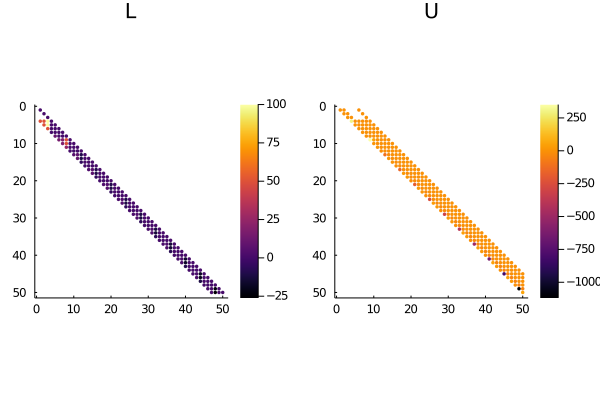

In [3]:
L,U = FNC.lufact(A)
spy(sparse(L),layout=2,subplot=1,markersize=2,title="L")
spy!(sparse(U),subplot=2,markersize=2,title="U")

However, if we introduce row pivoting, bandedness may be expanded or destroyed.

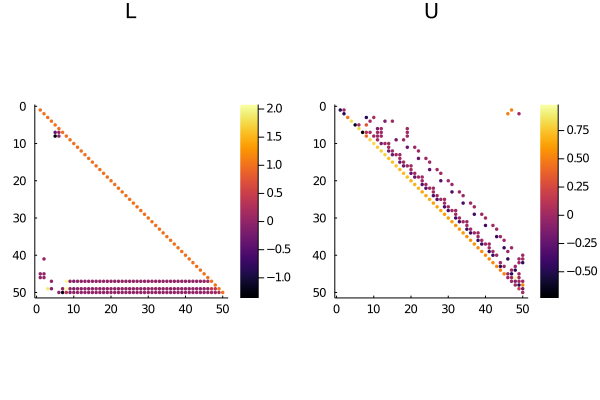

In [4]:
fact = lu(A)
spy(sparse(fact.L),layout=2,subplot=1,markersize=2,title="L")
spy!(sparse(fact.U),layout=2,subplot=2,markersize=2,title="U")